In [ ]:
from core import initialize_bodies
from core import calculate_force
from core import Body
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colormaps

In [44]:
# initialize bodies with random masses, positions, and velocities over set range
# bodies[n] = Body(mass, position [x, y], velocity [vx, vy])
#bodies = initialize_bodies(3, mass_range = [10, 100], position_range = [-50, 50], velocity_range = [-0.5, 0.5])

# using dimensionless units in terms of solar masses, AU
bodies = [
    Body(mass = 1, position=[0, 0], velocity=[0, 0]), # sun
    Body(mass = 3.00e-6, position=[1, 0], velocity=[0, 1]), # earth
    Body(mass = 3.21e-7, position=[1.5, 0], velocity=[0, np.sqrt(1/1.5)]), # mars
    Body(mass = 9.55e-4, position=[5.2, 0], velocity=[0, np.sqrt(1/5.2)]), # jupiter
    Body(mass = 2.86e-4, position=[9.5, 0], velocity=[0, np.sqrt(1/9.5)]), # saturn
    Body(mass = 4.36e-5, position=[19.2, 0], velocity=[0, np.sqrt(1/19.2)]), # uranus
    Body(mass = 5.15e-5, position=[30.1, 0], velocity=[0, np.sqrt(1/30.1)]) # neptune
]

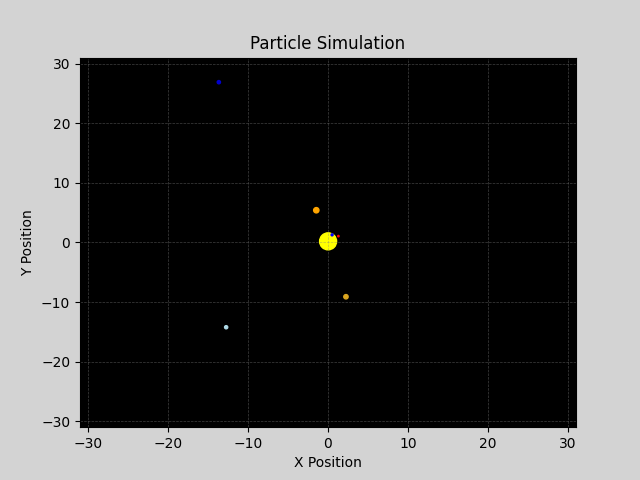

In [48]:
# Animation using matplotlib

%matplotlib widget

# Time step for position updates
dt = 0.1

# Set up the plot
fig, ax = plt.subplots()
ax.set_xlim(-31, 31) # X-axis limits
ax.set_ylim(-31, 31) # Y-axis limits
ax.set_title("Particle Simulation", color="black")  # Title
ax.set_xlabel("X Position", color="black")  # X-axis label
ax.set_ylabel("Y Position", color="black")  # Y-axis label
ax.tick_params(axis='x', colors="black")  # X-axis ticks
ax.tick_params(axis='y', colors="black")  # Y-axis ticks
ax.set_facecolor("black")  # Set background color
fig.patch.set_facecolor("lightgray")  # Outside the plot
ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)

#cmap = colormaps["tab20"].resampled(len(bodies))  # Dynamically resample colormap
#colors = [cmap(i) for i in range(len(bodies))] # Create list of colors
colors = ['yellow', 'blue', 'red', 'orange', 'goldenrod', 'lightblue', 'mediumblue'] # planet colors

# Create scatter plot with initial positions
scat = ax.scatter(
    [body.position[0] for body in bodies], # Initial x-coordinate of bodies
    [body.position[1] for body in bodies], # Initial y-coordinate of bodies
    s = [150*(body.mass)**(1/3) for body in bodies], # Size of bodies proportional to mass
    c = colors,  # Color of bodies
)

# Update function for animation
def update_position(frame):

    for n, body in enumerate(bodies):

        F = calculate_force(bodies) # calculate net force on bodies

        # Leapfrog method
        body.velocity += 0.5 * F[n] / body.mass * dt # Update velocity (half step)
        body.position += body.velocity * dt # Update position (full step)
        F = calculate_force(bodies) # Recalculate force
        body.velocity += 0.5 * F[n] / body.mass * dt # Update velocity (second half step)
        positions = [body.position for body in bodies] # Create array of positions to update scatter plot
    scat.set_offsets(positions)  # Update scatter plot
  
    return scat

# Create the animation
ani = animation.FuncAnimation(
    fig=fig,
    func=update_position,
    frames=range(5000),  # Number of frames
    interval=50,  # Time between frames in milliseconds
    repeat=False,  # Stop after the last frame
)

#ani.save('particle_simulation.mp4', writer='ffmpeg', fps=30) # Save animation as .mp4

# Show the plot
plt.show()

In [46]:
F = calculate_force(bodies)

for i, body in enumerate(bodies):
    print(f'Net foce on body_{i} Fx = {F[i,0]} Fy = {F[i,1]})')

Net foce on body_0 Fx = 3.0735820165767546e-05 Fy = 9.243492466139822e-06)
Net foce on body_1 Fx = -4.907359673691748e-07 Fy = 1.5270838256421357e-06)
Net foce on body_2 Fx = -8.42928322560749e-08 Fy = 8.937568669634966e-08)
Net foce on body_3 Fx = -3.27976631971324e-05 Fy = -9.57672757180716e-06)
Net foce on body_4 Fx = 2.752879340831454e-06 Fy = -1.1592167872499777e-06)
Net foce on body_5 Fx = -6.611450891144401e-08 Fy = -9.705029712748167e-08)
Net foce on body_6 Fx = -4.989300092990995e-08 Fy = -2.695732229368834e-08)
